In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

### Loading the dataset

In [30]:
dataset = pd.read_csv('data/possum.csv')

In [31]:
dataset = dataset.dropna()

In [32]:
dataset.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [33]:
dataset['Pop'].value_counts(), dataset['sex'].value_counts()

(Pop
 other    58
 Vic      43
 Name: count, dtype: int64,
 sex
 m    59
 f    42
 Name: count, dtype: int64)

## For simplexity

In [34]:
X = dataset[['Pop','age','hdlngth','skullw','totlngth','taill','chest','earconch','belly']]
y = dataset['sex']

In [35]:
X['Pop'] = X['Pop'].map({'Vic': 0, 'other': 1})
y = y.map({'m': 0, 'f': 1})

C:\Users\Admin\AppData\Local\Temp\ipykernel_16400\1794660921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Pop'] = X['Pop'].map({'Vic': 0, 'other': 1})


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, random_state=0)

## StandardScaler
Bring all the datapoint to x ~ N(0,I)

In [37]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [38]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression Model

In [39]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [40]:
y_hat = logistic_model.predict(X_test)

In [41]:
accuracy_score(y_test, y_hat)

0.6190476190476191

## Logistic Regression Mathematical Details

In [42]:
import matplotlib.pyplot as plt

We create a dataset of 2 different variable `RED` and `GREEN`. We need to find a way to separate these 2 tyoe.

In [65]:
RED = np.array([[1.,3.],[2.,2.5],[3.,2.],[4.,1.5],[5.,1.],[6.,0.5],[7.,0.]])
GREEN = RED[:,:2] + np.ones((7,2))*0.7
RED+=np.random.randn(7,2)*0.2
GREEN-=np.random.randn(7,2)*0.2

size = RED.shape[0]

In [66]:
RED = np.concatenate([RED, np.ones((size,1))], axis=1)
GREEN = np.concatenate([GREEN, np.zeros((size,1))], axis=1)
Dataset = np.concatenate([RED, GREEN], axis=0)
np.random.shuffle(Dataset)

In [67]:
y = Dataset[:,-1].reshape(-1,1)
X = np.concatenate([np.ones((Dataset.shape[0],1)), Dataset[:,:-1]], axis=1)

In [68]:
X

array([[1.        , 1.68478822, 2.40572585],
       [1.        , 7.32093269, 0.23616964],
       [1.        , 0.8553881 , 3.22625521],
       [1.        , 1.87191184, 3.51750208],
       [1.        , 4.00292955, 1.66566086],
       [1.        , 4.86301653, 0.64956096],
       [1.        , 2.6982746 , 3.24681708],
       [1.        , 7.66542848, 0.49579843],
       [1.        , 3.61215206, 2.76394115],
       [1.        , 3.17014561, 2.05167261],
       [1.        , 6.57332702, 1.2395289 ],
       [1.        , 5.5827311 , 1.73743897],
       [1.        , 6.09642952, 0.41146569],
       [1.        , 4.5302578 , 2.29736414]])

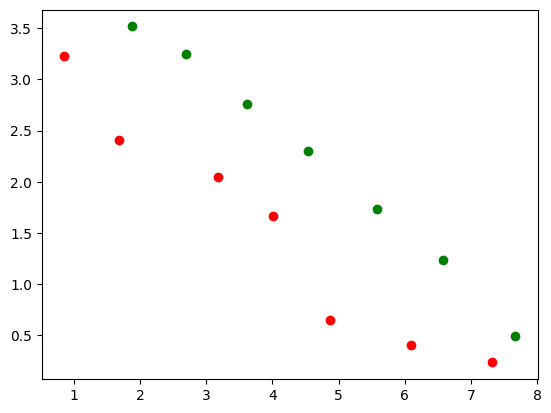

In [69]:
plt.scatter(RED[:,0], RED[:,1], color='red')
plt.scatter(GREEN[:,0], GREEN[:,1], color='green')

The key to the classification lies on the sigmoid function, denote $\sigma$

$$
    \sigma(x) = \frac{1}{1+e^{-x}}
$$

The value of $\sigma(x)$ will alway lies on D = (0,1)
![sigmoid](https://statstest.b-cdn.net/wp-content/uploads/2020/05/Simple-Logistic-Regression.jpg)

The loss function of Logistic function will be the BCE Loss (Binary Cross Entropy Loss)

$$
L = -(y*log(\hat{y})+(1-y)*log(1-\hat{y}))
$$
Which its partial derivative is 
$$
\frac{\partial L}{\partial w} = x^T*(\hat{y}-y)
$$
and
$$
\hat{y} = \frac{1}{1+e^{-s}}
$$ 

row
$$
s = xw 
$$ 
column

And we will use gradient descent to solve the problem

In [84]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))

def logistic(x,w):
    return sigmoid(x@w)

def bce_loss(y,y_hat):
    return -np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))

def gradf(x,y,y_hat):
    return (x.T@(y_hat-y)/y.shape[0])

In [85]:
w = np.random.random((3,1))
w

array([[0.75556114],
       [0.48475281],
       [0.98213739]])

C:\Users\Admin\AppData\Local\Temp\ipykernel_16400\2323090369.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x02 = float(-(w[0]) / w[2])
C:\Users\Admin\AppData\Local\Temp\ipykernel_16400\2323090369.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x11 = float(-(w[0]) / w[1])


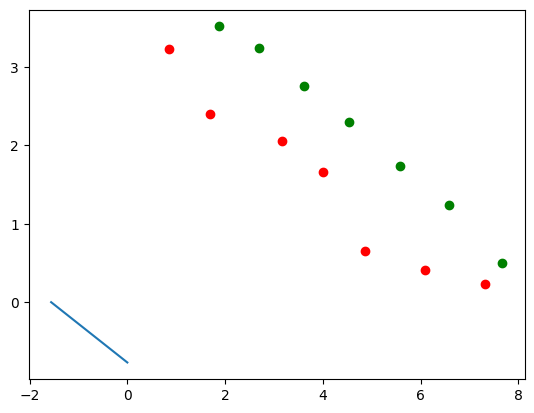

In [86]:
plt.scatter(RED[:,0], RED[:,1], color='red')
plt.scatter(GREEN[:,0], GREEN[:,1], color='green')

x01 = 0
x02 = float(-(w[0]) / w[2])
x12 = 0
x11 = float(-(w[0]) / w[1])

x01, x02, x11, x12
plt.plot([x01, x11], [x02, x12])

### Training

In [87]:
def train(x, y, w, lr, iter,tol=1e-5,reg_weight=1e-4):
  losses=[]
  prev_w = w
  for _ in range(iter):
    y_hat = logistic(x, w)
    
    loss = bce_loss(y,y_hat)
    grad = gradf(x,y,y_hat)
    # regulation l1(MAE) l2(MSE) 
    grad += np.sum(2*w*reg_weight)
    prev_w = w
    w = w - lr*grad
    if np.linalg.norm(prev_w - w) < tol:
      break
    
    losses.append(loss)

  return w, losses

[[13.95655098]
 [-1.71411208]
 [-3.54673031]]


C:\Users\Admin\AppData\Local\Temp\ipykernel_16400\271552865.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x02 = float(-(w[0]) / w[2])
C:\Users\Admin\AppData\Local\Temp\ipykernel_16400\271552865.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x11 = float(-(w[0]) / w[1])


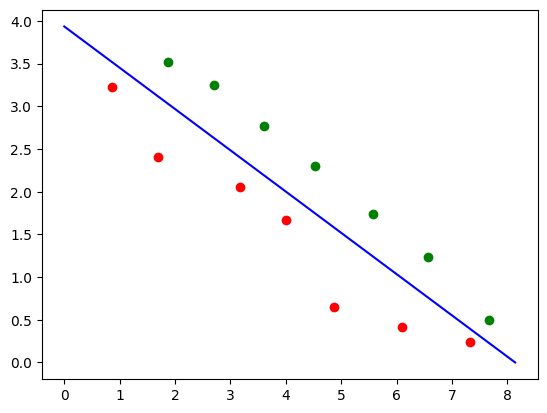

In [88]:
w, losses = train(X, y, w, lr=.45, iter=1000,tol=1e-5)
print(w)
x01 = 0
x02 = float(-(w[0]) / w[2])
x12 = 0
x11 = float(-(w[0]) / w[1])
plt.plot([x01, x11], [x02, x12], c='b')
plt.scatter(RED[:,0], RED[:,1], color='red')
plt.scatter(GREEN[:,0], GREEN[:,1], color='green')


In [89]:
len(losses)

1000

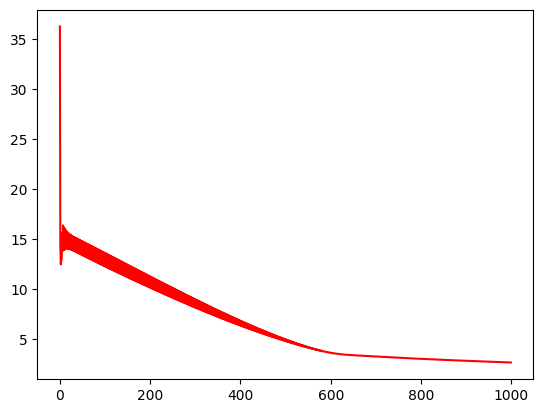

In [90]:
plt.plot(np.arange(1000), losses, color='red')

### Problems with Logistic Regression

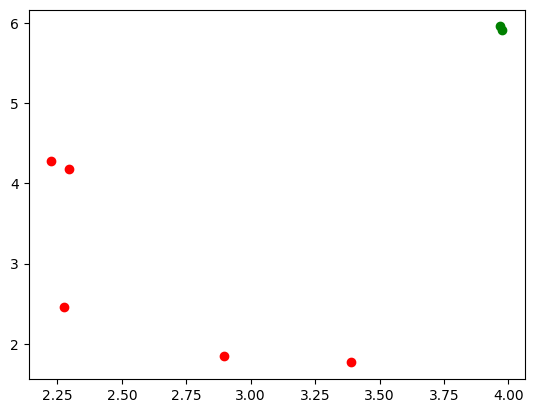

In [53]:
RED = np.array([[1.,3.],[1,3.],[2.,2.5],[3.,2.],[3.5,1.7]])
GREEN = RED[:,:2] + np.ones((5,2))*3
RED[:2,:2] = RED[:2,:2] +np.ones((2,2))*1.25
RED+=np.random.randn(5,2)*0.1
GREEN-=np.random.randn(5,2)*0.1


size = RED.shape[0]
RED = np.concatenate([RED, np.ones((size,1))], axis=1)
GREEN = np.concatenate([GREEN, np.zeros((size,1))], axis=1)[:2,:]

Dataset = np.concatenate([RED, GREEN], axis=0)
np.random.shuffle(Dataset)
plt.scatter(RED[:,0], RED[:,1], color='red')
plt.scatter(GREEN[:,0], GREEN[:,1], color='green')



In [54]:
y = Dataset[:,-1].reshape(-1,1)
X = np.concatenate([np.ones((Dataset.shape[0],1)), Dataset[:,:-1]], axis=1)

[[33.43346554]
 [-2.50139252]
 [-5.0825265 ]]


C:\Users\Admin\AppData\Local\Temp\ipykernel_16400\2364048886.py:8: RuntimeWarning: divide by zero encountered in log
  return -(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
C:\Users\Admin\AppData\Local\Temp\ipykernel_16400\3482994757.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x02 = float(-(w[0]) / w[2])
C:\Users\Admin\AppData\Local\Temp\ipykernel_16400\3482994757.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x11 = float(-(w[0]) / w[1])


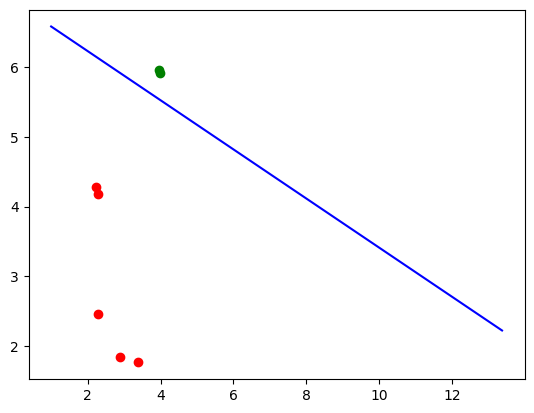

In [55]:
w = np.random.random((3,1))
w, losses = train(X, y, w, lr=.45, iter=100000,tol=1e-3)
print(w)
x01 = X[0,0]
x02 = float(-(w[0]) / w[2])
x12 = X[0,1]
x11 = float(-(w[0]) / w[1])
plt.plot([x01, x11], [x02, x12], c='b')
plt.scatter(RED[:,0], RED[:,1], color='red')
plt.scatter(GREEN[:,0], GREEN[:,1], color='green')